**Проект "Student Performance"**

Подготовка данных, обучение модели, сохраниние модели для создания веб приложения.


---
Загружаем нужные библиотеки:

In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
import pickle


In [208]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
df = pd.read_csv('/content/drive/MyDrive/AI_1/Student_Performance.csv')
df


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Приводим порядок названия столбцов.Убираем пропуски и переводим на нижний регистр

In [217]:
df.columns.str.lower().str.replace(' ', '_')

Index(['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_papers_practiced', 'performance_index'],
      dtype='object')

In [218]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [219]:
replace_dict={'Yes':'1','No':'0'}
df['extracurricular_activities']=df['extracurricular_activities'].replace(replace_dict).astype('int')

Смотрим информацию о DF

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hours_studied                     10000 non-null  int64  
 1   previous_scores                   10000 non-null  int64  
 2   extracurricular_activities        10000 non-null  int64  
 3   sleep_hours                       10000 non-null  int64  
 4   sample_question_papers_practiced  10000 non-null  int64  
 5   performance_index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


Получаем анализ по колонкам

In [221]:
df.describe()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


Проверяем на дубликаты


In [222]:
df.duplicated().sum()

127

In [223]:
df.drop_duplicates(inplace=True)
df

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


Удаляем дубликаты

In [224]:
df.isnull().sum()

,0
hours_studied,0
previous_scores,0
extracurricular_activities,0
sleep_hours,0
sample_question_papers_practiced,0
performance_index,0


In [225]:
df.duplicated().sum()

0

In [226]:
df = np.log1p(df)

df.describe()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,1.675774,4.222768,0.343098,1.992329,1.530107,3.961162
std,0.508510,0.257121,0.346574,0.234840,0.688835,0.387842
min,0.693147,3.713572,0.000000,1.609438,0.000000,2.397895
25%,1.386294,4.007333,0.000000,1.791759,1.098612,3.713572
50%,1.791759,4.248495,0.000000,2.079442,1.791759,4.025352
75%,2.079442,4.454347,0.693147,2.197225,2.079442,4.262680
max,2.302585,4.605170,0.693147,2.302585,2.302585,4.615121


<Axes: >

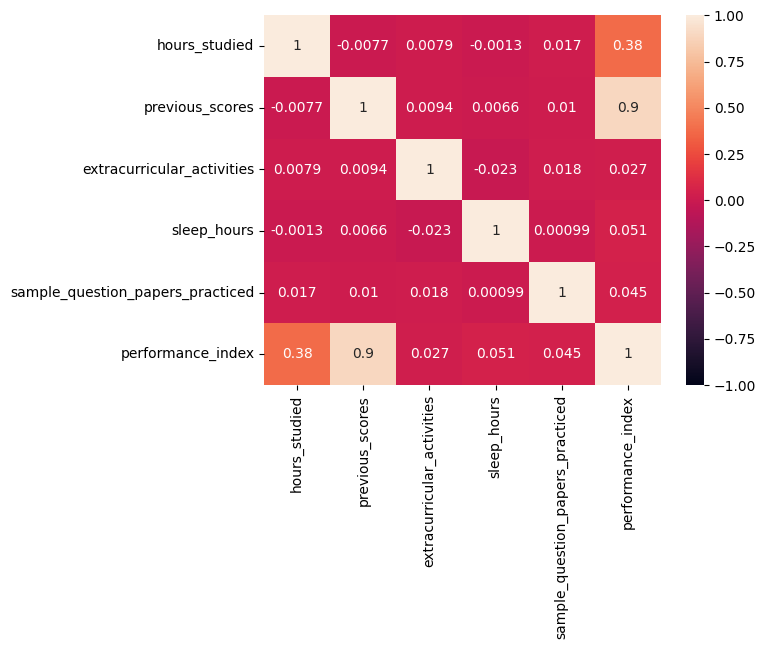

In [227]:
df_correlation = df.corr()

sns.heatmap(df_correlation, vmin=-1, vmax=1, annot=True)

**Exploratory data analysis (EDA)**

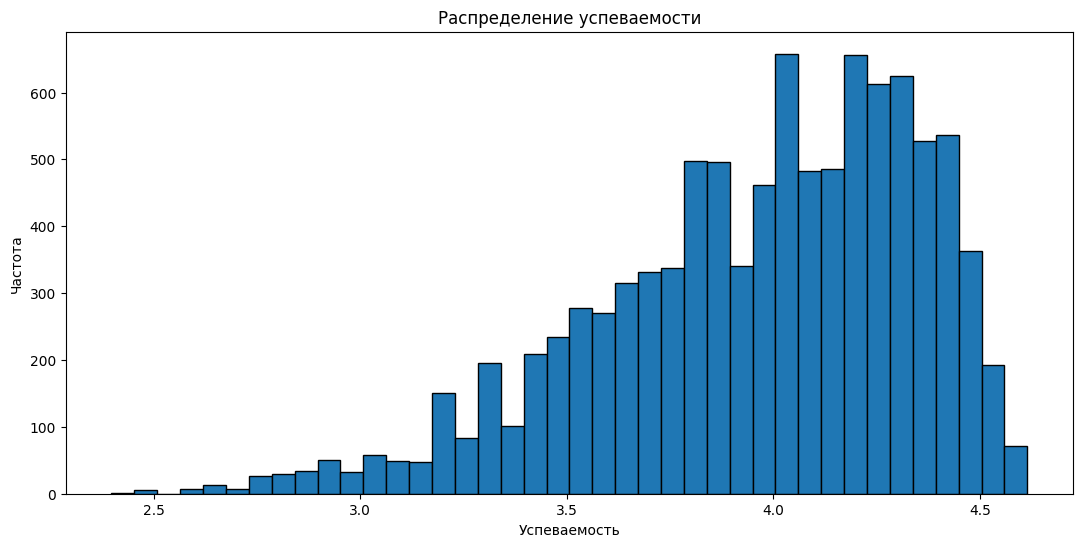

In [228]:
plt.figure(figsize=(13, 6))

sns.histplot(df['performance_index'], bins=40, alpha=1)
plt.ylabel('Частота')
plt.xlabel('Успеваемость')
plt.title('Распределение успеваемости')

plt.show()

In [229]:
skewness = df.performance_index.skew()

print(f"Скошенность (асимметрия): {skewness}")

Скошенность (асимметрия): -0.7622560610430337


In [230]:
df.performance_index.describe()

,performance_index
count,9873.000000
mean,3.961162
std,0.387842
min,2.397895
25%,3.713572
50%,4.025352
75%,4.262680
max,4.615121


In [231]:
X = df.drop('performance_index', axis=1)
y = df.performance_index

In [232]:
X.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced
0,2.079442,4.605170,0.693147,2.302585,0.693147
1,1.609438,4.418841,0.000000,1.609438,1.098612
2,2.197225,3.951244,0.693147,2.079442,1.098612
3,1.791759,3.970292,0.693147,1.791759,1.098612
4,2.079442,4.330733,0.000000,2.197225,1.791759


In [233]:
y.describe()

,performance_index
count,9873.000000
mean,3.961162
std,0.387842
min,2.397895
25%,3.713572
50%,4.025352
75%,4.262680
max,4.615121


**Обучение модели **

In [234]:

from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val  = train_test_split(X, y, test_size=0.4, random_state=1)

In [236]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=1)

In [237]:
len(X_train),len(X_test),len(X_val)

(5923, 1975, 1975)

In [238]:
len(y_train),len(y_test),len(y_val)

(5923, 1975, 1975)

In [239]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [240]:
model.score(X_test, y_test)

0.95589851119252

In [241]:
preds_train = model.predict(X_train)

print("-- Тренировочные --")
print("Предсказанные данные")
print(preds_train[:5])

print()
print("Реальные данные")
print(y_train[:5].values)

print()
print("Разница:")
print(preds_train[:5] - y_train[:5].values)

-- Тренировочные --
Предсказанные данные
[3.48928102 4.20194907 3.91321882 3.51292721 4.13335065]

Реальные данные
[3.33220451 4.21950771 3.98898405 3.61091791 4.14313473]

Разница:
[ 0.1570765  -0.01755863 -0.07576523 -0.0979907  -0.00978408]


In [242]:
preds_test = model.predict(X_test)

print("-- Тестирвоание --")
print("Предсказанные данные")
print(preds_test[:5])

print()
print("Реальные данные")
print(y_test[:5].values)

print()
print("Разница:")
print(preds_test[:5] - y_test[:5].values)

-- Тестирвоание --
Предсказанные данные
[3.93353436 4.13434331 4.35626842 4.51007071 4.33363757]

Реальные данные
[4.00733319 4.29045944 4.31748811 4.47733681 4.35670883]

Разница:
[-0.07379882 -0.15611614  0.03878031  0.0327339  -0.02307126]


In [243]:
preds_val = model.predict(X_val)

print("-- Валидация --")
print("Предсказанные данные")
print(preds_val[:5])

print()
print("Реальные данные")
print(y_val[:5].values)

print()
print("Разница:")
print(preds_val[:5] - y_val[:5].values)

-- Валидация --
Предсказанные данные
[4.04443938 3.31896651 3.75540432 4.1136575  4.48437379]

Реальные данные
[4.18965474 3.29583687 3.78418963 4.15888308 4.44265126]

Разница:
[-0.14521536  0.02312964 -0.02878531 -0.04522558  0.04172253]


In [244]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
print("-- Работа с тренировочными данными --")
print(f"Среднеквадратичная ошибка = {mean_squared_error(y_train, preds_train)}")
print(f"Средняя абсолютная ошибка = {mean_absolute_error(y_train, preds_train)}")
print(f"Коэффициент детерминации = {r2_score(y_train, preds_train)}")

-- Работа с тренировочными данными --
Среднеквадратичная ошибка = 0.006404842768571074
Средняя абсолютная ошибка = 0.058547482570434704
Коэффициент детерминации = 0.9564212249929552


In [245]:
print("-- Работа с тестовыми данными --")
print(f"Среднеквадратичная ошибка = {mean_squared_error(y_test, preds_test)}")
print(f"Средняя абсолютная ошибка = {mean_absolute_error(y_test, preds_test)}")
print(f"Коэффициент детерминации = {r2_score(y_test, preds_test)}")

-- Работа с тестовыми данными --
Среднеквадратичная ошибка = 0.0070436058354764
Средняя абсолютная ошибка = 0.06027219935568062
Коэффициент детерминации = 0.95589851119252


In [246]:
print("-- Работа с валидационными данными --")
print(f"Среднеквадратичная ошибка = {mean_squared_error(y_val, preds_val)}")
print(f"Средняя абсолютная ошибка = {mean_absolute_error(y_val, preds_val)}")
print(f"Коэффициент детерминации = {r2_score(y_val, preds_val)}")

-- Работа с валидационными данными --
Среднеквадратичная ошибка = 0.006570841761954188
Средняя абсолютная ошибка = 0.059432029991095696
Коэффициент детерминации = 0.9565805557845543


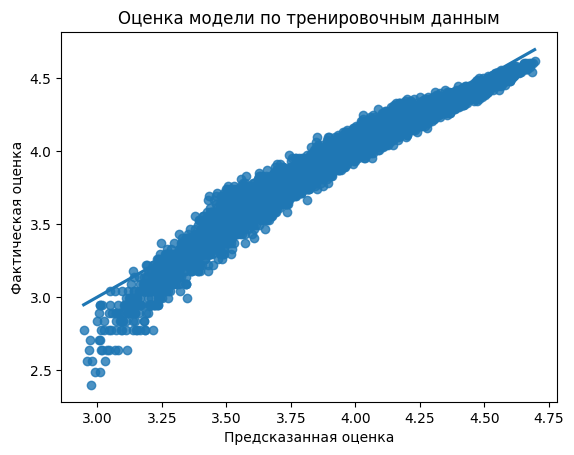

In [247]:
sns.regplot(x=preds_train, y=y_train)

plt.title("Оценка модели по тренировочным данным")
plt.xlabel("Предсказанная оценка")
plt.ylabel("Фактическая оценка")

plt.show()

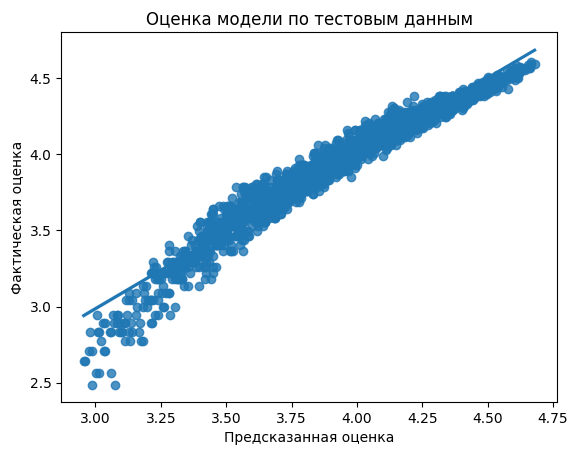

In [248]:
sns.regplot(x=preds_test, y=y_test)

plt.title("Оценка модели по тестовым данным")
plt.xlabel("Предсказанная оценка")
plt.ylabel("Фактическая оценка")

plt.show()

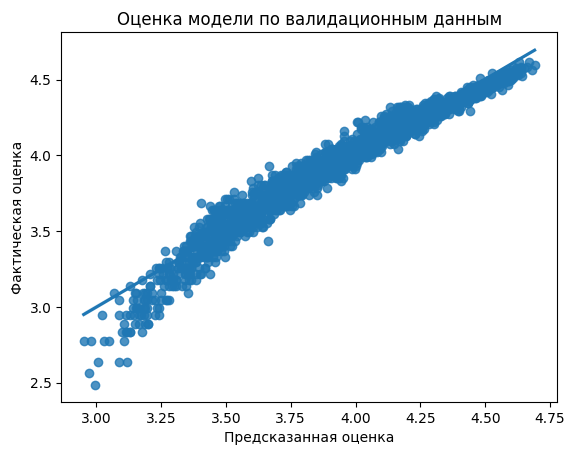

In [249]:
sns.regplot(x=preds_val, y=y_val)

plt.title("Оценка модели по валидационным данным")
plt.xlabel("Предсказанная оценка")
plt.ylabel("Фактическая оценка")

plt.show()

In [250]:
preds_train_transformed_back = np.expm1(preds_train)

y_train_transformed_back = np.expm1(y_train)

In [251]:
print("Предсказанные данные")
print(preds_train_transformed_back[:5])

print()

print("Реальные данные")
print(y_train_transformed_back[:5].values)

print()
print("Разница:")
print(preds_train_transformed_back[:5] - y_train_transformed_back[:5].values)

Предсказанные данные
[31.76238358 65.8164343  49.05982631 32.54632143 61.38660858]

Реальные данные
[27. 67. 53. 36. 62.]

Разница:
[ 4.76238358 -1.1835657  -3.94017369 -3.45367857 -0.61339142]


In [252]:
preds_test_transformed_back = np.expm1(preds_test)

y_test_transformed_back = np.expm1(y_test)

In [253]:
print("Предсказанные данные")
print(preds_test_transformed_back[:5])

print()

print("Реальные данные")
print(y_test_transformed_back[:5].values)

print()
print("Разница:")
print(preds_test_transformed_back[:5] - y_test_transformed_back[:5].values)

Предсказанные данные
[50.08721979 61.44856798 76.96565582 89.92824794 75.22104221]

Реальные данные
[54. 72. 74. 87. 77.]

Разница:
[ -3.91278021 -10.55143202   2.96565582   2.92824794  -1.77895779]


In [254]:
preds_val_transformed_back = np.expm1(preds_val)

y_val_transformed_back = np.expm1(y_val)

In [ ]:
print("Предсказанные данные")
print(preds_val_transformed_back[:5])

print()

print("Реальные данные")
print(y_val_transformed_back[:5].values)

print()
print("Разница:")
print(preds_val_transformed_back[:5] - y_val_transformed_back[:5].values)

Предсказанные данные
[62.7449494  82.51639181 35.35495141 70.8638981  76.03868454]

Реальные данные
[64. 80. 35. 69. 76.]

Разница:
[-1.2550506   2.51639181  0.35495141  1.8638981   0.03868454]


In [256]:
model_file_path = '/content/drive/MyDrive/AI_1/project_1_student_performance.sav'
pickle.dump(model, open(model_file_path, 'wb'))